In [1]:
import xgboost as xgb

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

## XGBoost Training 

In [299]:
bert_label = pd.read_csv('train_data_bert_label.csv', header = 0)[['predicted_label']]
bert_label

,predicted_label
0,1
1,1
2,1
3,1
4,1
...,...
416763,0
416764,0
416765,0
416766,0


In [301]:
train = pd.read_csv('train_data_with_feature_ver_2.csv')
train = train.join(bert_label)
train

,original_text,label,processed_text,average_AoA_Kup_lem,percentage_of_basic_words,average_concreteness,average_percentage_known,predicted_label
0,There is manuscript evidence that Austen conti...,1,"['there', 'is', 'manuscript', 'evidence', 'tha...",10.441842,0.552632,1.974211,0.995926,1
1,"In a remarkable comparative analysis , Mandaea...",1,"['in', 'a', 'remarkable', 'comparative', 'anal...",13.332857,0.285714,1.655714,0.994167,1
2,"Before Persephone was released to Hermes , who...",1,"['before', 'persephone', 'was', 'released', 't...",7.664762,0.619048,2.106667,0.992647,1
3,Cogeneration plants are commonly found in dist...,1,"['cogeneration', 'plants', 'are', 'commonly', ...",9.592187,0.312500,2.324375,0.993333,1
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,"['geneva', 'lrb', '', '', '', '', '', '', '', ...",14.498214,0.500000,1.749643,0.989333,1
...,...,...,...,...,...,...,...,...
416763,A Duke Nukem 3D version has been sold for Xbox...,0,"['a', 'duke', 'nukem', '3d', 'version', 'has',...",13.474000,0.533333,2.168000,0.982000,0
416764,"However , it is becoming replaced as a method ...",0,"['however', '', 'it', 'is', 'becoming', 'repla...",8.628333,0.666667,1.910000,0.992143,0
416765,There are hand gestures in both Hindu and Budd...,0,"['there', 'are', 'hand', 'gestures', 'in', 'bo...",8.610000,0.600000,2.587000,1.000000,0
416766,"If it is necessary to use colors , try to choo...",0,"['if', 'it', 'is', 'necessary', 'to', 'use', '...",6.475897,0.666667,2.391538,0.995833,0


In [304]:
train = pd.read_csv('train_data_with_feature_ver_3.csv', index_col = 0)
train

,original_text,label,processed_text,text_length,average_AoA_Kup_lem,percentage_of_basic_words,average_concreteness,average_percentage_known
0,There is manuscript evidence that Austen conti...,1,"['there', 'is', 'manuscript', 'evidence', 'tha...",4,5.923793,0.552632,2.354815,0.995926
1,"In a remarkable comparative analysis , Mandaea...",1,"['in', 'a', 'remarkable', 'comparative', 'anal...",2,7.499286,0.285714,2.117500,0.994167
2,"Before Persephone was released to Hermes , who...",1,"['before', 'persephone', 'was', 'released', 't...",4,5.322162,0.619048,2.357647,0.992647
3,Cogeneration plants are commonly found in dist...,1,"['cogeneration', 'plants', 'are', 'commonly', ...",3,6.738889,0.312500,2.997143,0.993333
4,"Geneva -LRB- , ; , ; , ; ; -RRB- is the second...",1,"['geneva', 'lrb', '', '', '', '', '', '', '', ...",3,5.396667,0.500000,2.364667,0.989333
...,...,...,...,...,...,...,...,...
416763,A Duke Nukem 3D version has been sold for Xbox...,0,"['a', 'duke', 'nukem', '3d', 'version', 'has',...",1,5.790000,0.533333,2.732000,0.982000
416764,"However , it is becoming replaced as a method ...",0,"['however', '', 'it', 'is', 'becoming', 'repla...",1,6.581875,0.666667,2.158571,0.992143
416765,There are hand gestures in both Hindu and Budd...,0,"['there', 'are', 'hand', 'gestures', 'in', 'bo...",1,6.788889,0.600000,2.973750,1.000000
416766,"If it is necessary to use colors , try to choo...",0,"['if', 'it', 'is', 'necessary', 'to', 'use', '...",4,4.932222,0.666667,2.504167,0.995833


In [305]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 416768 entries, 0 to 416767
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   original_text              416768 non-null  object 
 1   label                      416768 non-null  int64  
 2   processed_text             416768 non-null  object 
 3   text_length                416768 non-null  int64  
 4   average_AoA_Kup_lem        416760 non-null  float64
 5   percentage_of_basic_words  416768 non-null  float64
 6   average_concreteness       404958 non-null  float64
 7   average_percentage_known   416768 non-null  float64
dtypes: float64(4), int64(2), object(2)
memory usage: 28.6+ MB


In [179]:
import matplotlib.pyplot as plt

(array([ 93794.,      0., 174168.,      0.,      0.,  96122.,      0.,
         37020.,      0.,  15664.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

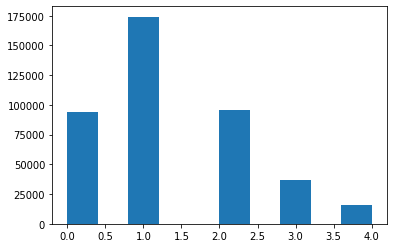

In [180]:
plt.hist(train['text_length'])

(array([6.37000e+02, 1.13326e+05, 2.59256e+05, 2.74910e+04, 4.84800e+03,
        1.39200e+03, 6.72000e+02, 2.72000e+02, 4.50000e+01, 2.00000e+01]),
 array([ 1.89 ,  3.601,  5.312,  7.023,  8.734, 10.445, 12.156, 13.867,
        15.578, 17.289, 19.   ]),
 <BarContainer object of 10 artists>)

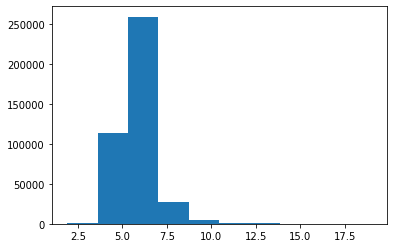

In [135]:
plt.hist(train['average_AoA_Kup_lem'])

(array([ 20924.,   7638.,  25523.,  53939.,  94514., 129727.,  58451.,
         19363.,   4235.,   2454.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

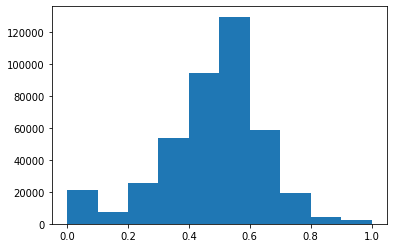

In [131]:
plt.hist(train['percentage_of_basic_words'])

(array([  1146.,   6751.,  83739., 184040.,  95647.,  21121.,   5670.,
          2864.,   2229.,   1751.]),
 array([1.19 , 1.571, 1.952, 2.333, 2.714, 3.095, 3.476, 3.857, 4.238,
        4.619, 5.   ]),
 <BarContainer object of 10 artists>)

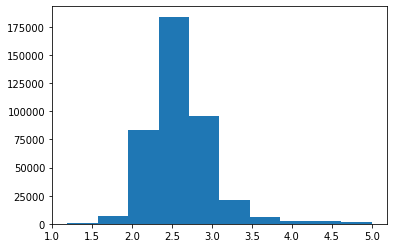

In [132]:
plt.hist(train['average_concreteness'])

(array([1.88000e+02, 1.40000e+01, 5.00000e+01, 5.30000e+01, 1.29000e+02,
        4.98000e+02, 5.89000e+02, 3.65600e+03, 3.60240e+04, 3.63757e+05]),
 array([0.85 , 0.865, 0.88 , 0.895, 0.91 , 0.925, 0.94 , 0.955, 0.97 ,
        0.985, 1.   ]),
 <BarContainer object of 10 artists>)

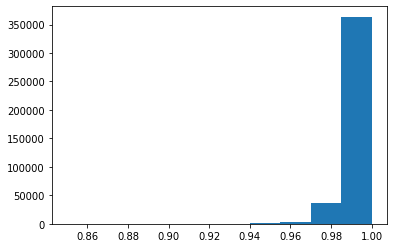

In [133]:
plt.hist(train['average_percentage_known'])

In [306]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [307]:
from sklearn.model_selection import StratifiedShuffleSplit
sss= StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in sss.split(train, train['label']):
    strat_train_set = train.iloc[train_index]
    strat_test_set = train.iloc[test_index]
strat_train_set['label'].value_counts()/len(strat_train_set)

0    0.5
1    0.5
Name: label, dtype: float64

In [308]:
X_train, y_train = strat_train_set[['average_AoA_Kup_lem',
       'percentage_of_basic_words', 'average_concreteness',
       'average_percentage_known', 'text_length']], strat_train_set['label']

In [309]:
X_train.shape

(333414, 5)

In [310]:
y_train.shape

(333414,)

In [311]:
X_test, y_test = strat_test_set[['average_AoA_Kup_lem',
       'percentage_of_basic_words', 'average_concreteness',
       'average_percentage_known', 'text_length']], strat_test_set['label']

In [312]:
X_test.shape

(83354, 5)

In [313]:
y_test.shape

(83354,)

In [314]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [316]:
# pipe = Pipeline([('scaler', MinMaxScaler()), ('imputer', SimpleImputer(strategy='mean'))])
pipe = Pipeline([('imputer', SimpleImputer(strategy='mean'))])

In [317]:
transformed_X_train = pipe.fit_transform(X_train)
transformed_X_test = pipe.transform(X_test)

In [318]:
transformed_X_train

array([[4.72416667, 0.80769231, 2.86208333, 0.99666667, 2.        ],
       [5.42888889, 0.63636364, 2.2275    , 1.        , 1.        ],
       [5.6       , 0.2       , 4.52      , 1.        , 0.        ],
       ...,
       [5.892     , 0.38888889, 2.296     , 0.993     , 1.        ],
       [4.989     , 0.76923077, 3.26909091, 0.99636364, 1.        ],
       [6.60428571, 0.40909091, 3.32357143, 0.99142857, 3.        ]])

In [319]:
transformed_X_test

array([[6.23344828, 0.58823529, 2.15777778, 0.9962963 , 3.        ],
       [4.53777778, 0.78571429, 2.45      , 0.99      , 1.        ],
       [6.14363636, 0.5       , 2.48818182, 0.99636364, 1.        ],
       ...,
       [5.57810811, 0.59090909, 2.59676471, 0.99235294, 4.        ],
       [4.96      , 0.6       , 1.69666667, 1.        , 0.        ],
       [5.82394737, 0.52941176, 2.23805556, 0.99277778, 4.        ]])

In [276]:
dtrain = xgb.DMatrix(transformed_X_train, label = y_train)

In [277]:
dvalid = xgb.DMatrix(transformed_X_test, label = y_test)

In [337]:
from sklearn.linear_model import LogisticRegression

In [338]:
logistic_clf = LogisticRegression()
logistic_clf.fit(transformed_X_train, y_train)
logistic_clf.score(transformed_X_test, y_test)

0.6093048923866881

In [339]:
from sklearn.svm import SVC

In [ ]:
svc_clf = SVC()
svc_clf.fit(transformed_X_train, y_train)
svc_clf.score(transformed_X_test, y_test)

In [320]:
param_dist = {'objective':'binary:logistic', 'n_estimators':100, 'max_depth':15, 'eta': 0.8}
clf = xgb.XGBModel(**param_dist)

In [321]:
clf.fit(transformed_X_train, y_train,
        eval_set=[(transformed_X_train, y_train), (transformed_X_test, y_test)],
        eval_metric='error',
        verbose=True)

[0]	validation_0-error:0.30759	validation_1-error:0.35152
[1]	validation_0-error:0.28809	validation_1-error:0.34830
[2]	validation_0-error:0.27530	validation_1-error:0.34802
[3]	validation_0-error:0.26987	validation_1-error:0.34765
[4]	validation_0-error:0.26657	validation_1-error:0.34715
[5]	validation_0-error:0.26171	validation_1-error:0.34635
[6]	validation_0-error:0.25316	validation_1-error:0.34622
[7]	validation_0-error:0.24993	validation_1-error:0.34671
[8]	validation_0-error:0.24844	validation_1-error:0.34668
[9]	validation_0-error:0.24260	validation_1-error:0.34584
[10]	validation_0-error:0.23813	validation_1-error:0.34574
[11]	validation_0-error:0.23315	validation_1-error:0.34529
[12]	validation_0-error:0.22853	validation_1-error:0.34484
[13]	validation_0-error:0.22265	validation_1-error:0.34508
[14]	validation_0-error:0.21696	validation_1-error:0.34398
[15]	validation_0-error:0.21254	validation_1-error:0.34365
[16]	validation_0-error:0.20899	validation_1-error:0.34326
[17]	va

XGBModel(base_score=0.5, booster='gbtree', colsample_bylevel=1,
         colsample_bynode=1, colsample_bytree=1, eta=0.8, gamma=0, gpu_id=-1,
         interaction_constraints='', learning_rate=0.800000012,
         max_delta_step=0, max_depth=15, min_child_weight=1,
         monotone_constraints='()', n_jobs=8, num_parallel_tree=1,
         objective='binary:logistic', predictor='auto', random_state=0,
         reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
         tree_method='exact', validate_parameters=1)

## Prediction

In [231]:
test_bert_label = pd.read_csv('test_data_bert_label.csv', header = 0, index_col = 0)
test_bert_label.columns = ['predicted_label']
test_bert_label

,predicted_label
id,
0,0
1,0
2,0
3,0
4,1
...,...
119087,1
119088,1
119089,1


In [322]:
test = pd.read_csv('test_data_with_feature_ver_3.csv', index_col = 0)
test

,original_text,label,processed_text,text_length,average_AoA_Kup_lem,percentage_of_basic_words,average_concreteness,average_percentage_known
id,,,,,,,,
0,-2011,NaN,['2011'],0,0.00,0.0,NaN,1.00
1,-2011,NaN,['2011'],0,0.00,0.0,NaN,1.00
2,-2000,NaN,['2000'],0,0.00,0.0,NaN,1.00
3,-1997,NaN,['1997'],0,0.00,0.0,NaN,1.00
4,1.636,NaN,['1636'],0,0.00,0.0,NaN,1.00
...,...,...,...,...,...,...,...,...
119087,#NAME?,NaN,['name'],0,3.68,1.0,3.5,0.96
119088,#NAME?,NaN,['name'],0,3.68,1.0,3.5,0.96
119089,#NAME?,NaN,['name'],0,3.68,1.0,3.5,0.96


In [233]:
test = test.join(test_bert_label)
test

,original_text,label,processed_text,average_AoA_Kup_lem,percentage_of_basic_words,average_concreteness,average_percentage_known,predicted_label
id,,,,,,,,
0,-2011,NaN,['2011'],NaN,0.0,NaN,NaN,0
1,-2011,NaN,['2011'],NaN,0.0,NaN,NaN,0
2,-2000,NaN,['2000'],NaN,0.0,NaN,NaN,0
3,-1997,NaN,['1997'],NaN,0.0,NaN,NaN,0
4,1.636,NaN,['1636'],NaN,0.0,NaN,NaN,1
...,...,...,...,...,...,...,...,...
119087,#NAME?,NaN,['name'],3.68,1.0,3.5,0.96,1
119088,#NAME?,NaN,['name'],3.68,1.0,3.5,0.96,1
119089,#NAME?,NaN,['name'],3.68,1.0,3.5,0.96,1


In [323]:
X = test[['average_AoA_Kup_lem',
       'percentage_of_basic_words', 'average_concreteness',
       'average_percentage_known', 'text_length']]

In [324]:
X

,average_AoA_Kup_lem,percentage_of_basic_words,average_concreteness,average_percentage_known,text_length
id,,,,,
0,0.00,0.0,NaN,1.00,0
1,0.00,0.0,NaN,1.00,0
2,0.00,0.0,NaN,1.00,0
3,0.00,0.0,NaN,1.00,0
4,0.00,0.0,NaN,1.00,0
...,...,...,...,...,...
119087,3.68,1.0,3.5,0.96,0
119088,3.68,1.0,3.5,0.96,0
119089,3.68,1.0,3.5,0.96,0


In [325]:
transformed_X = pipe.transform(X)

In [326]:
transformed_X

array([[0.        , 0.        , 2.60366682, 1.        , 0.        ],
       [0.        , 0.        , 2.60366682, 1.        , 0.        ],
       [0.        , 0.        , 2.60366682, 1.        , 0.        ],
       ...,
       [3.68      , 1.        , 3.5       , 0.96      , 0.        ],
       [3.68      , 1.        , 3.5       , 0.96      , 0.        ],
       [3.68      , 1.        , 3.5       , 0.96      , 0.        ]])

In [327]:
ypred = clf.predict(transformed_X)

In [328]:
ypred

array([0.30558553, 0.30558553, 0.30558553, ..., 0.20303436, 0.20303436,
       0.20303436], dtype=float32)

In [329]:
result = ypred > 0.5

In [330]:
result = pd.DataFrame(result)

In [331]:
result[0] = result[0].astype(int)

In [332]:
result.columns = ['label']

In [333]:
result.index.name = 'id'

In [334]:
result.label.sum()

60978

In [335]:
result.to_csv('testing.csv')